Дані пов'язані з прямими маркетинговими кампаніями (телефонними дзвінками) португальської банківської установи. Задача моделі - передбачити, чи підпишеться клієнт на строковий депозит ( цільова змінна - y).

## Data loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
# sns.set(rc={'figure.figsize':(10, 8)}); 

In [2]:
df = pd.read_csv('D:/Machine Learning Course/ML_Fall2024/LW1/bank--additional-full.csv', sep = ';') 

## Data understanding

* age - Вік замовника
* job - Робота замовника
* marital - Сімейний стан клієнта
* education - Освітній статус клієнта
* default - Чи має клієнт банківський кредит
* housing - Чи брав клієнт іпотеку
* loan - Чи брав клієнт особистий кредит
* is_telephone_contact - Чи був контакт з клієнтом через стаціонарний телефон
* month - Місяць, коли з клієнтом був останній контакт
* day_of_week - День тижня, коли з клієнтом востаннє зв'язувалися
* duration - Скільки часу пройшло з моменту останнього контакту з клієнтом?
* campaign - Кількість дзвінків одному клієнту в рамках однієї кампанії
* pdays - Кількість днів, що минули з моменту останнього контакту з клієнтом у попередній кампанії
* previous - Кількість дзвінків, здійснених з цим клієнтом до цієї кампанії
* poutcome - Результат попередньої кампанії для цього клієнта
* y - Результат поточної кампанії для цього клієнта

##### Попередній аналіз наявних даних:

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Маємо проблему, що не "помічаються" пропущенні дані. В датасеті пропущені дані вказані наступним чином: 

['unknown' : pd.NA] ['nonexistent' : pd.NA] [999 : np.nan]

In [8]:
df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']] = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']].replace('unknown', pd.NA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df[['poutcome']] = df[['poutcome']].replace('nonexistent', pd.NA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df[['pdays']] = df[['pdays']].replace(999, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.isnull().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [12]:
df.isnull().sum().sum()

87954

In [13]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,1515.000000,41188.000000,5625,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,failure,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,4252,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,6.014521,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,3.824906,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,3.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,6.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,7.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


Як бачимо, тепер значно краще. Ми бачимо кількість пропущених значень відповідно до колонок і загальну кількість в датасеті.

##### Варто перевірити набір даних на наявність дублікативних даних.

In [14]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,NaN,0,<NA>,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,<NA>,no,no,no,telephone,jul,thu,...,1,NaN,0,<NA>,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,NaN,0,<NA>,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,NaN,0,<NA>,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,NaN,0,<NA>,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,<NA>,no,no,cellular,aug,mon,...,1,NaN,0,<NA>,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,NaN,0,<NA>,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,NaN,0,<NA>,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,NaN,0,<NA>,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,NaN,0,<NA>,-1.8,92.893,-46.2,1.313,5099.1,no


In [15]:
df.drop_duplicates(inplace = True)
df.duplicated().value_counts()

False    41176
Name: count, dtype: int64

##### Правильна інформація по даним:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41176 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [17]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,40846,41096,39446,32580,40186,40186,41176,41176,41176,...,41176.000000,1515.000000,41176.000000,5625,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,failure,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,...,NaN,NaN,NaN,4252,NaN,NaN,NaN,NaN,NaN,36537
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567879,6.014521,0.173013,NaN,0.081922,93.575720,-40.502863,3.621293,5167.034870,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770318,3.824906,0.494964,NaN,1.570883,0.578839,4.627860,1.734437,72.251364,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,3.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,6.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,7.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## Візуалізації

In [18]:
def create_boxplot(x, y, data, title, xlabel, ylabel, palette, ax):
    sns.boxplot(x=x, y=y, hue=x, data=data, palette=palette, ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def create_countplot(column, hue, title, ax):
    ax = sns.countplot(x=column, hue=hue, data=df, palette='pink', ax=ax)
    
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
    ax.set_title(title)


##### Описова статистика

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f'\nОписова статистика для змінної: {column}')
    print(df[column].value_counts())



Описова статистика для змінної: job
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

Описова статистика для змінної: marital
marital
married     24921
single      11564
divorced     4611
Name: count, dtype: int64

Описова статистика для змінної: education
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: count, dtype: int64

Описова статистика для змінної: default
default
no     32577
yes        3
Name: count, dtype: int64

Описова статистика для змінної: housing
housing
yes    21571
no     18615
Name: count, dtype: int64

Описова статистика для змінної: loan
loan
no     33938
yes     624

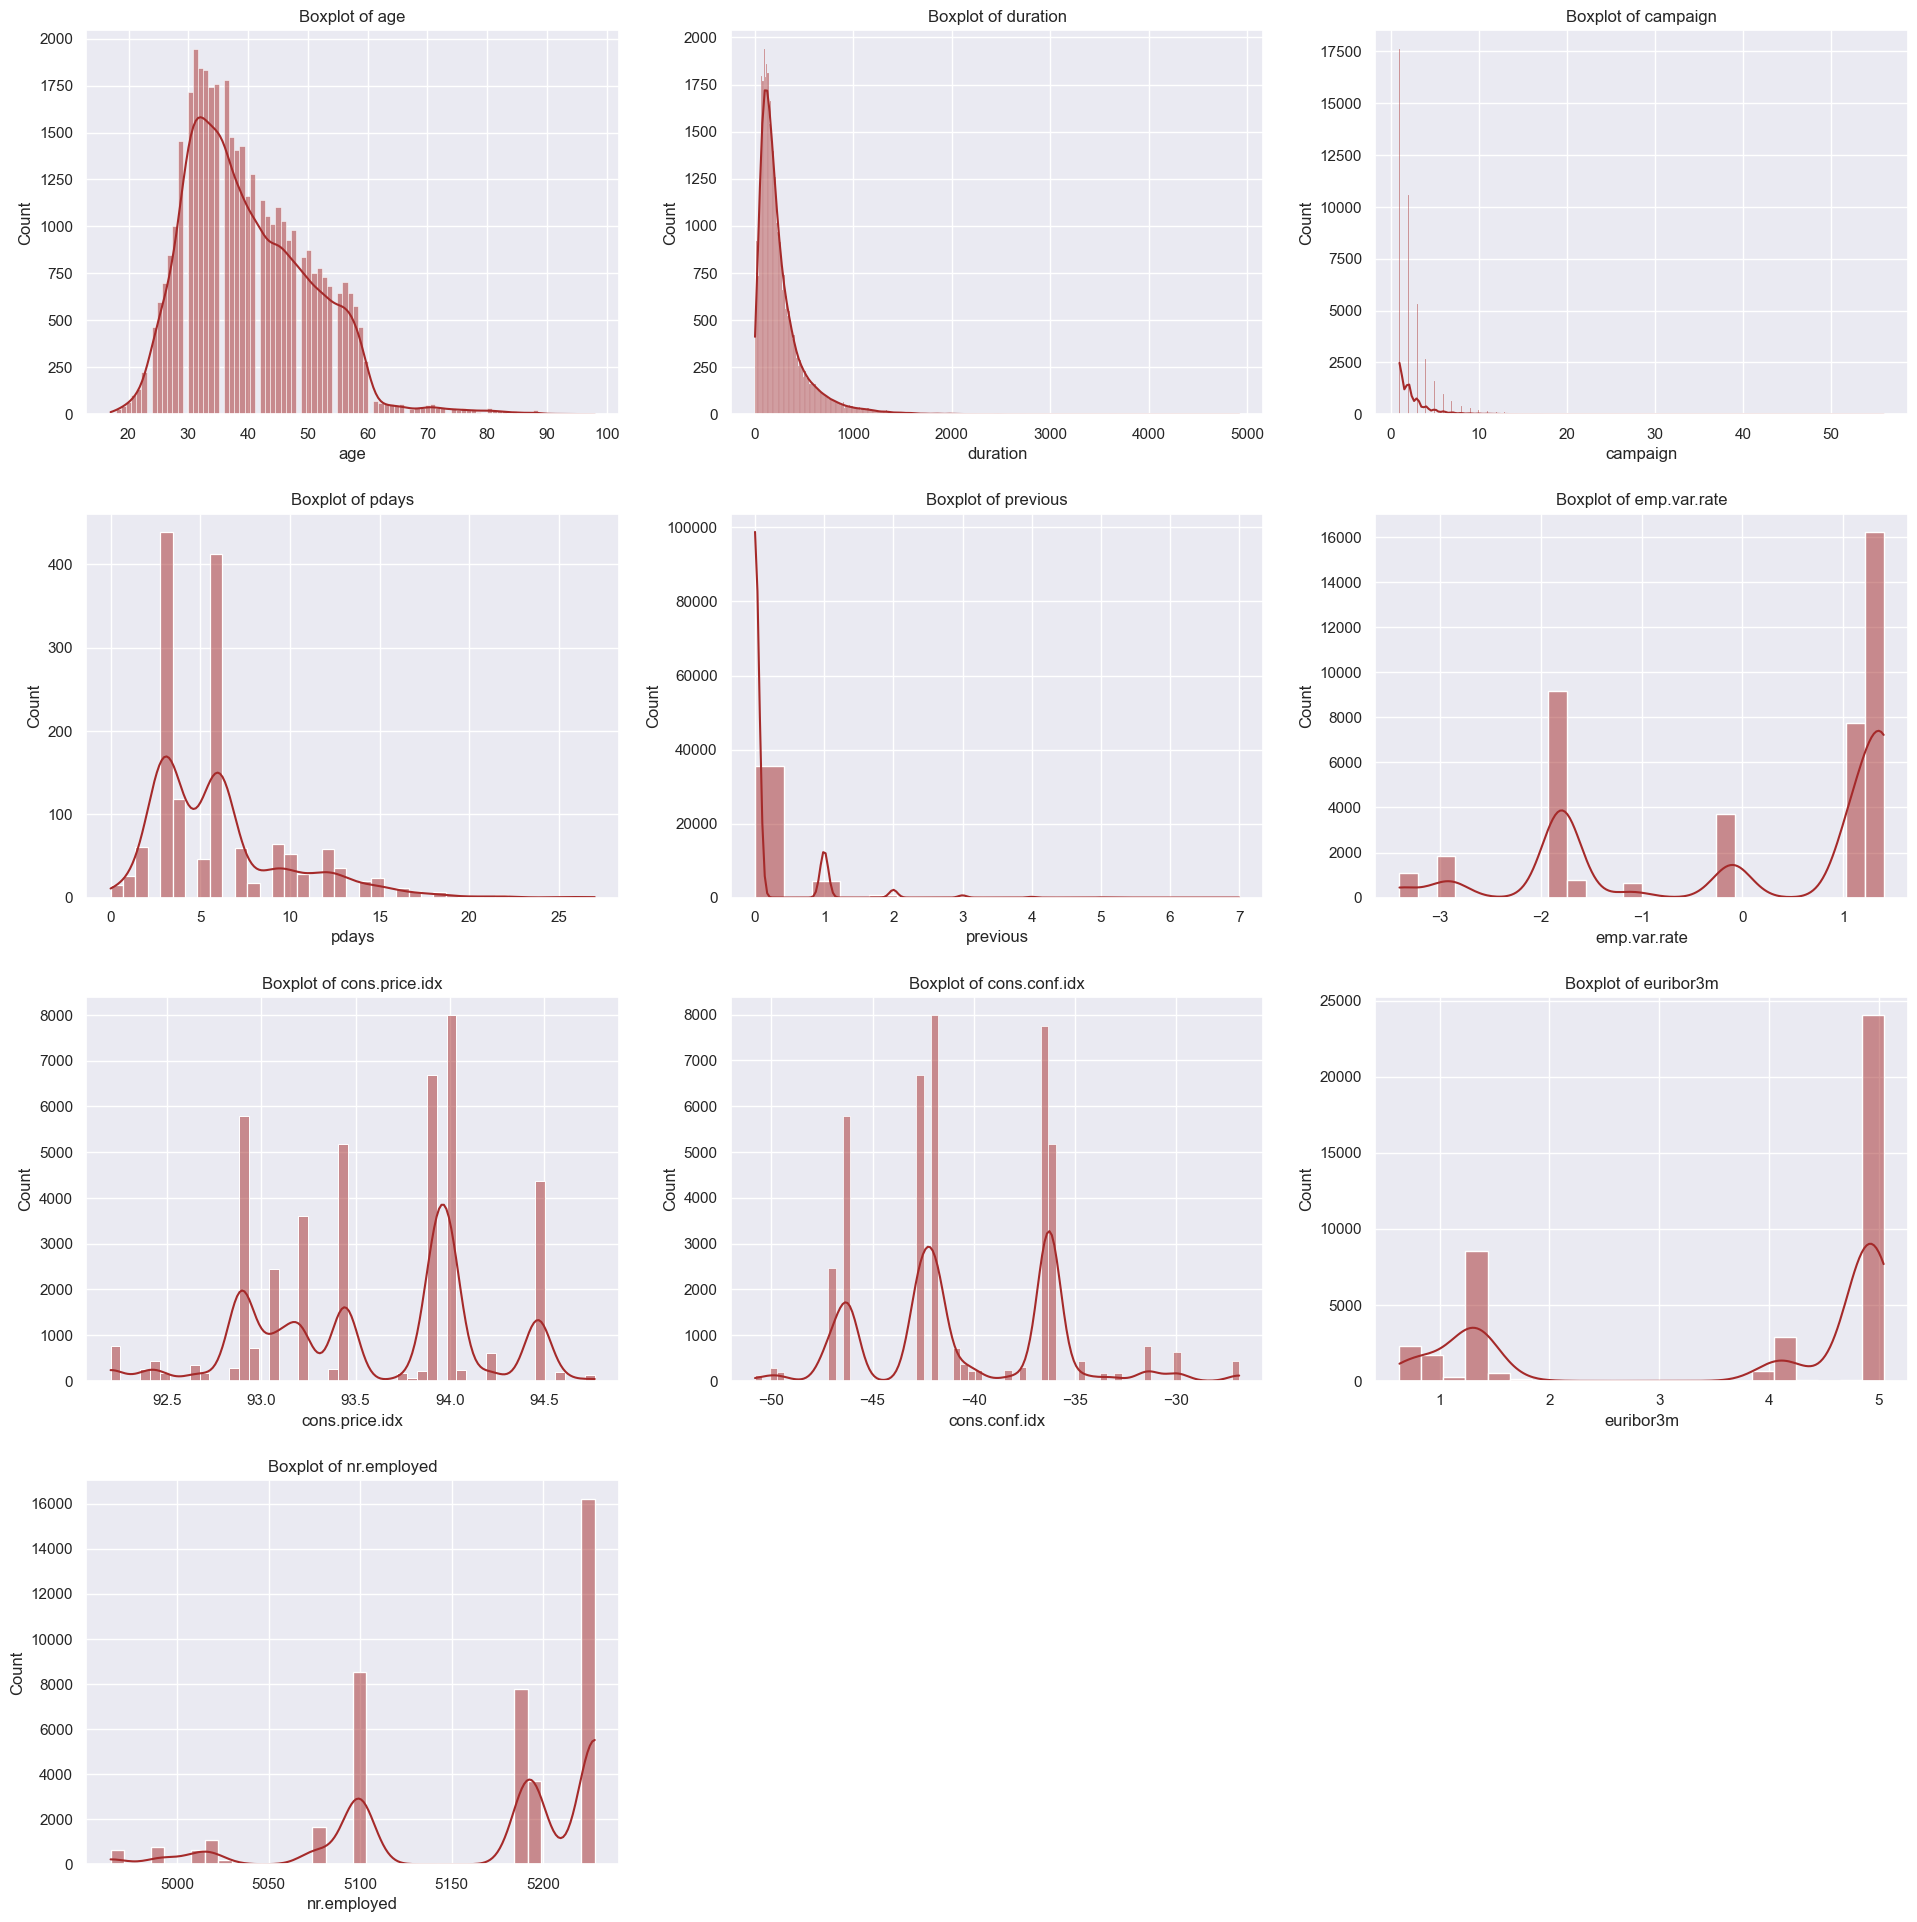

In [20]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

cols = 3
rows = (len(numeric_columns) + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=4.0)

for i, column in enumerate(numeric_columns):
    row = i // cols
    col = i % cols
    sns.histplot(x=df[column], color='brown', ax=axes[row, col], kde = True)
    axes[row, col].set_title(f'Boxplot of {column}')

for j in range(len(numeric_columns), rows * cols):
    fig.delaxes(axes.flat[j])

plt.show()


##### Дослідження на наявність викидів

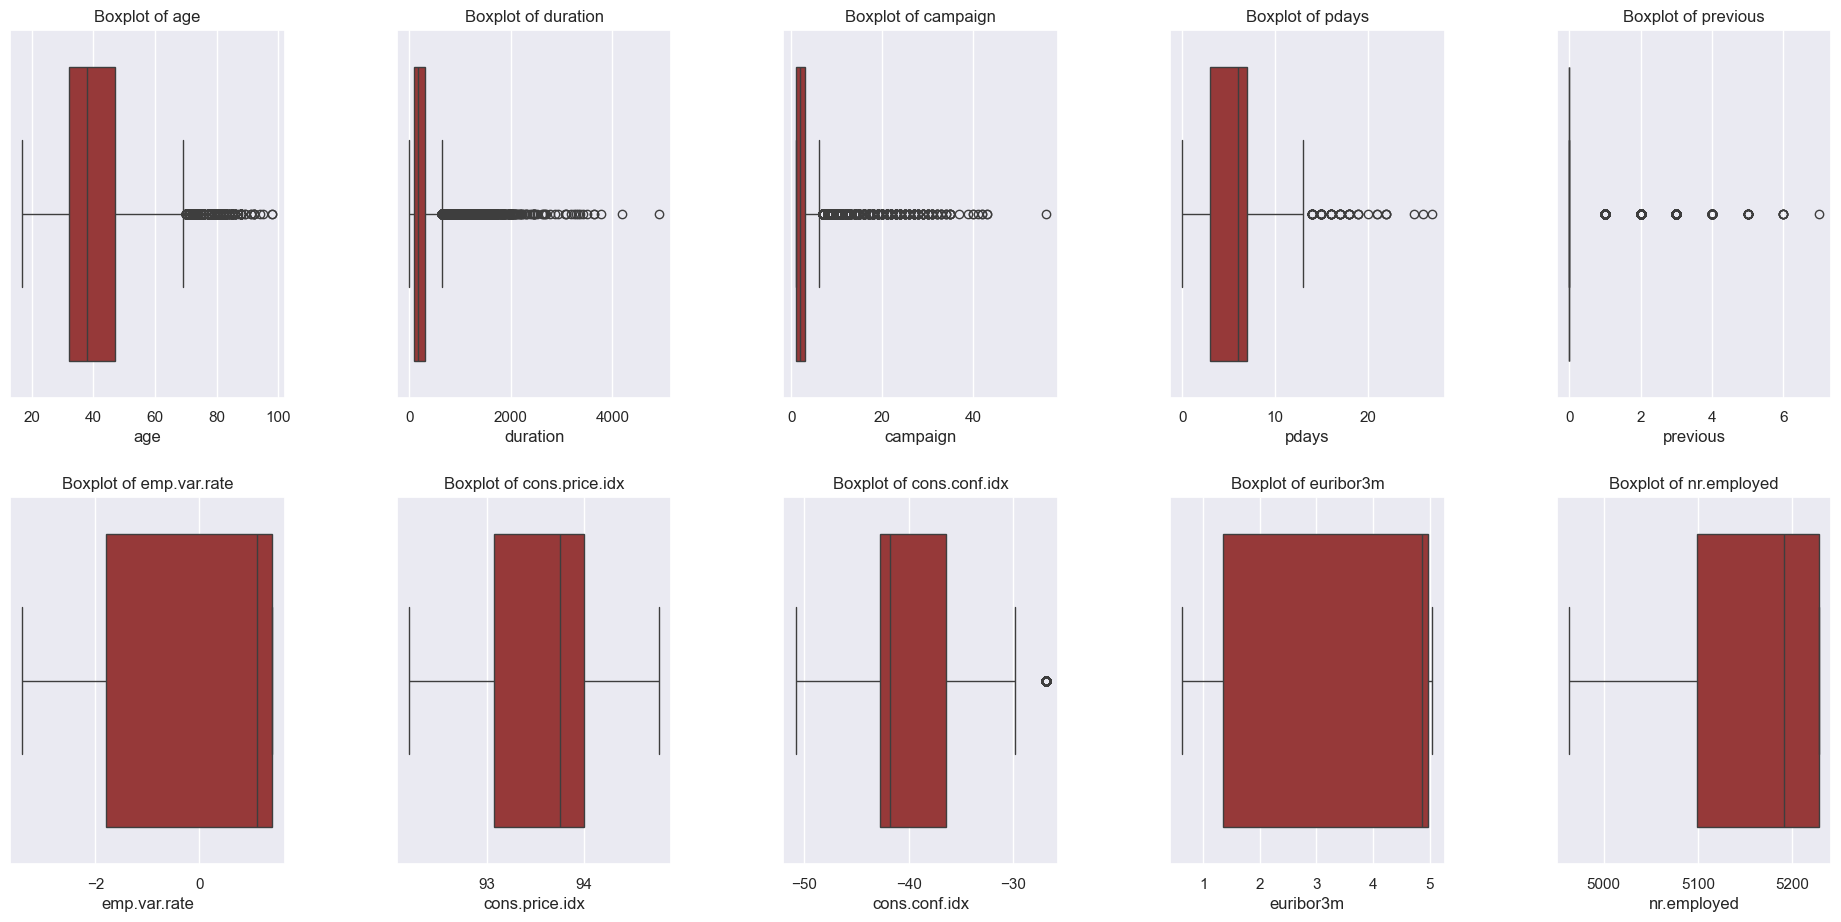

In [21]:
# about wrong data 
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

cols = 5
rows = (len(numeric_columns) + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.tight_layout(pad=4.0)

for i, column in enumerate(numeric_columns):
    row = i // cols
    col = i % cols
    sns.boxplot(x=df[column], color='brown', ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for j in range(len(numeric_columns), rows * cols):
    fig.delaxes(axes.flat[j])

plt.show()


##### Демографічні дані:

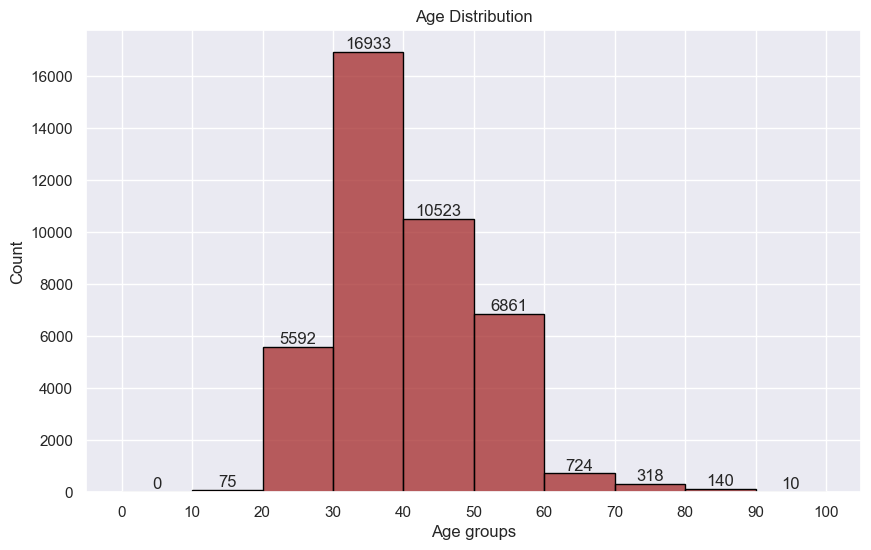

In [22]:
# Age Distribution
bins = np.arange(0, 101, 10)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['age'], bins=bins, kde=False, edgecolor='black', color = 'brown')


for i in ax.containers:
    ax.bar_label(i, )

plt.xlabel('Age groups')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(bins)
plt.show()

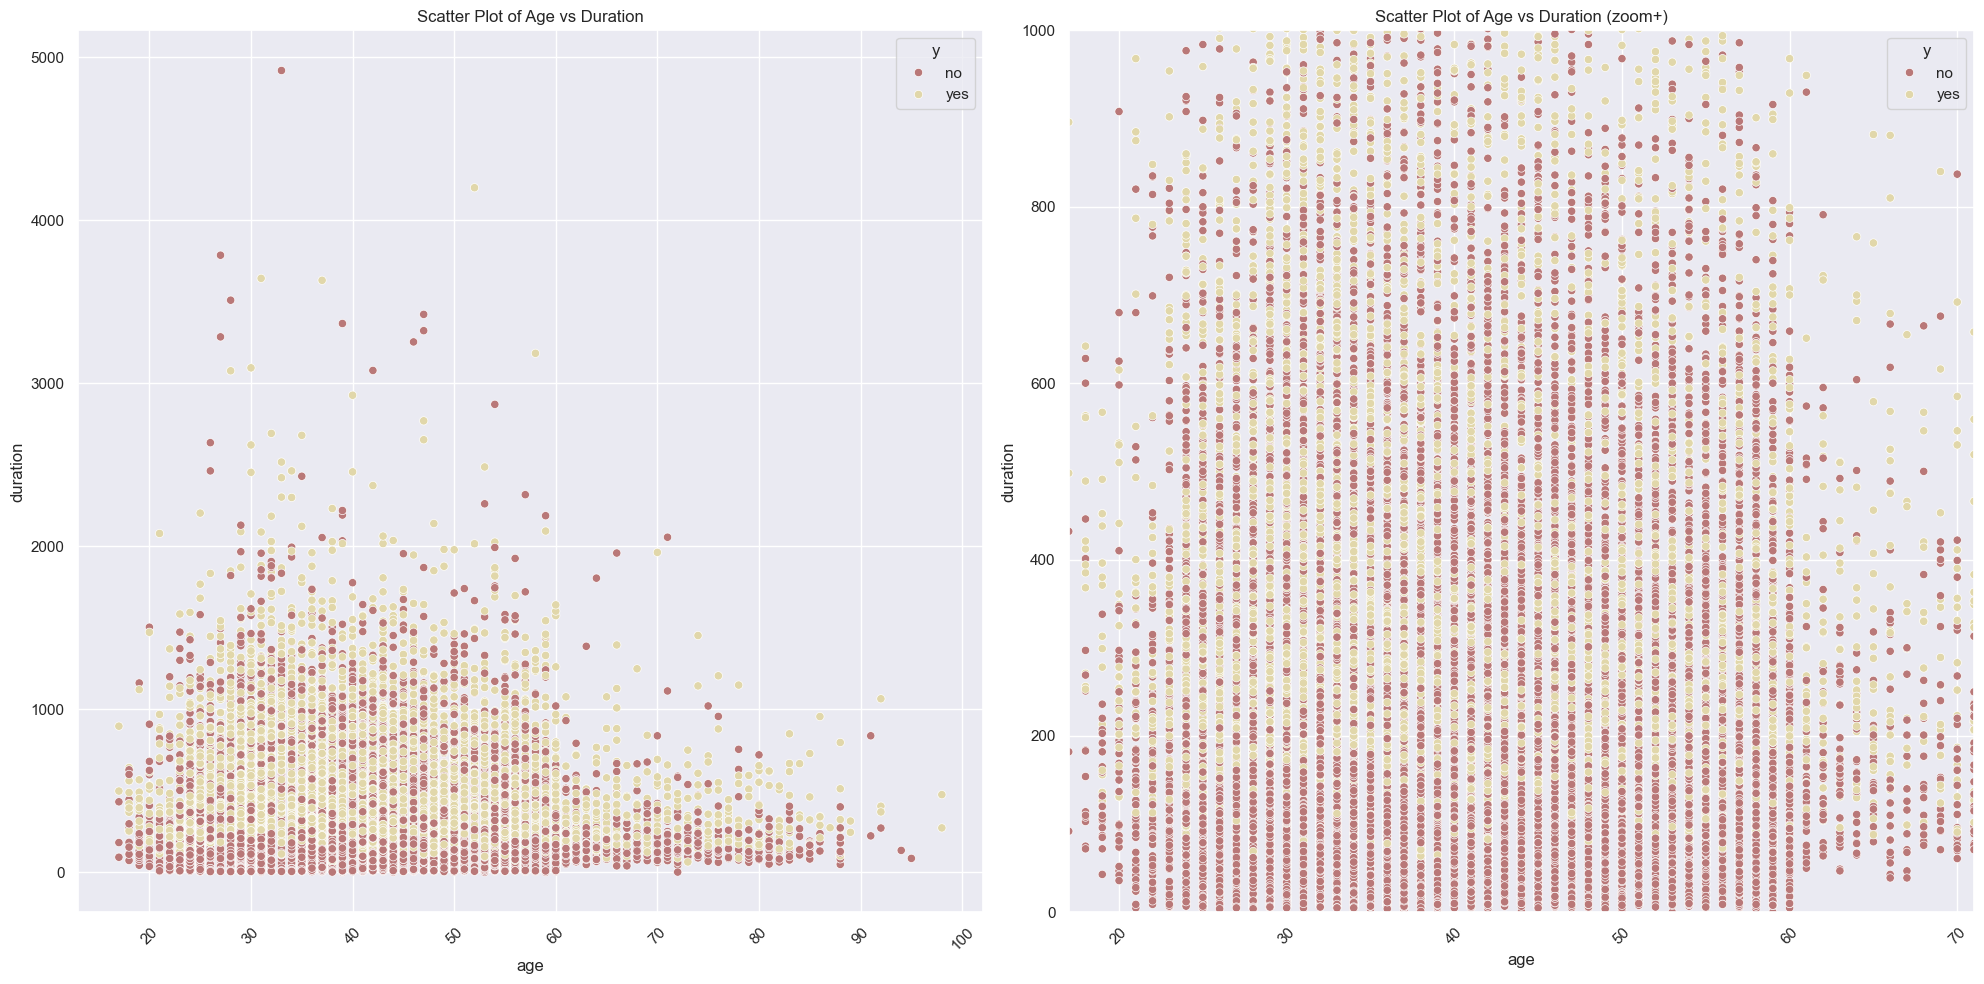

In [23]:
#age - duration

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) 

############################################################################
ax = sns.scatterplot(x='age', y='duration', data=df, hue='y', palette='pink', ax=axes[0])
axes[0].set_title('Scatter Plot of Age vs Duration')
axes[0].tick_params(axis='x', rotation=45)

############################################################################
ax = sns.scatterplot(x='age', y='duration', data=df, hue='y', palette='pink', ax=axes[1])
axes[1].set_title('Scatter Plot of Age vs Duration (zoom+)')
axes[1].tick_params(axis='x', rotation=45)
plt.ylim(0,1000)
plt.xlim(17, 71)
plt.tight_layout()
plt.show()


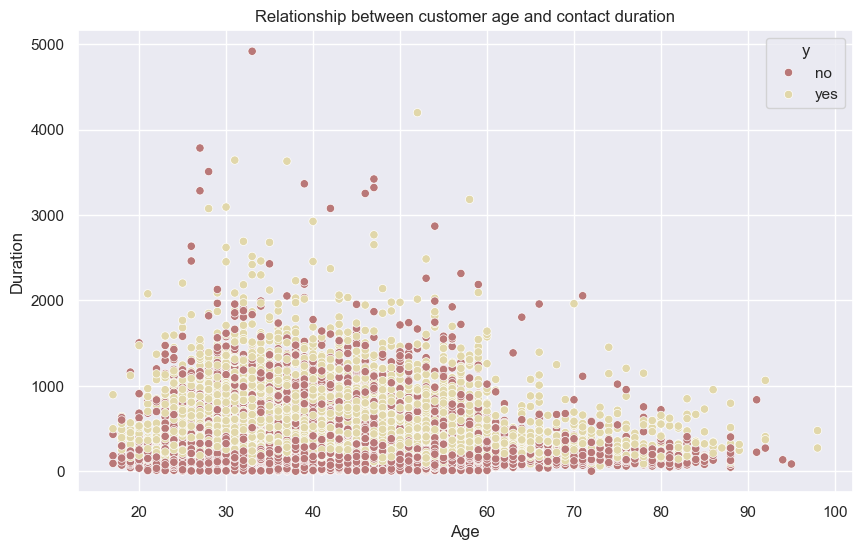

Pearsons correlation coefficient: -0.0008
p-value: 0.8697


In [24]:
#Age - duration [corr]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', data=df, hue='y', palette='pink')

plt.title('Relationship between customer age and contact duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

correlation, p_value = pearsonr(df['age'], df['duration'])

print(f'Pearsons correlation coefficient: {correlation:.4f}')
print(f'p-value: {p_value:.4f}') #p-значення < 0.05 - статистично значущa.


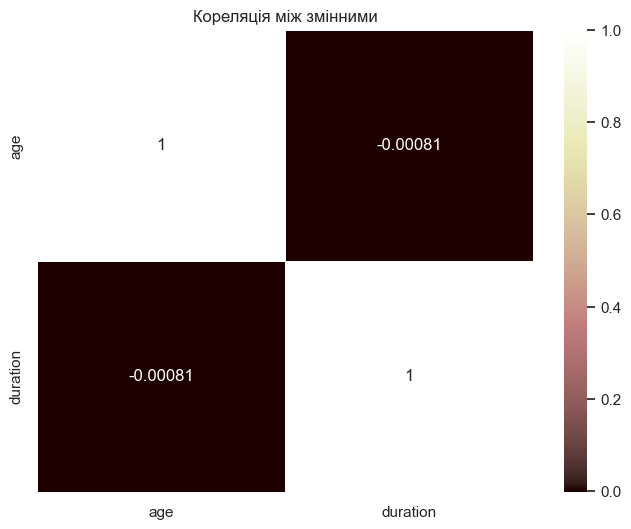

In [25]:
#heatmap corr
matrix = df[['age', 'duration']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='pink', linewidths=0.5)

plt.title('Кореляція між змінними')
plt.show()

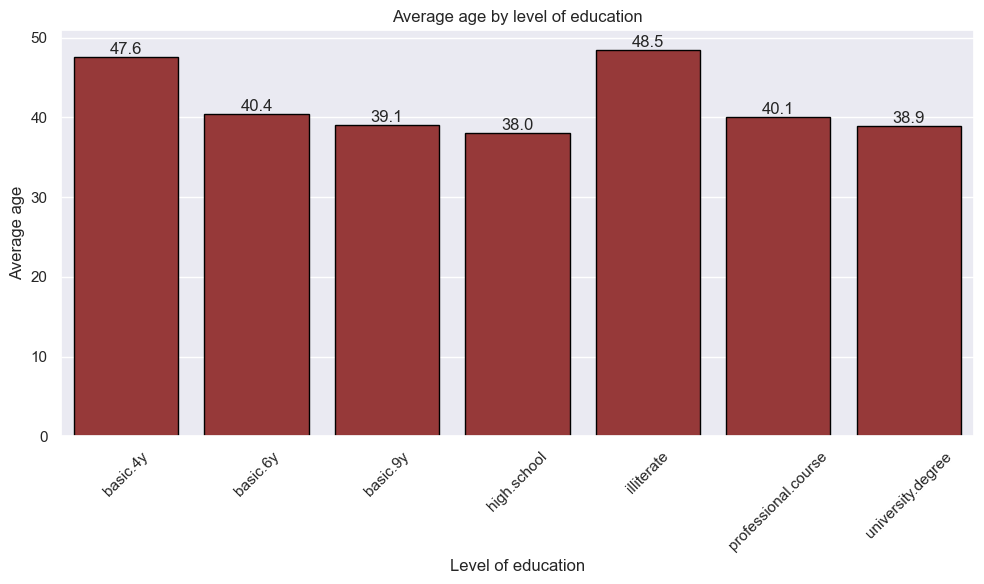

In [26]:
#education - age
education_age_means = df.groupby('education')['age'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='education', y='age', data=education_age_means, color='brown', edgecolor = 'black')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Average age by level of education')
plt.xlabel('Level of education')
plt.ylabel('Average age')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


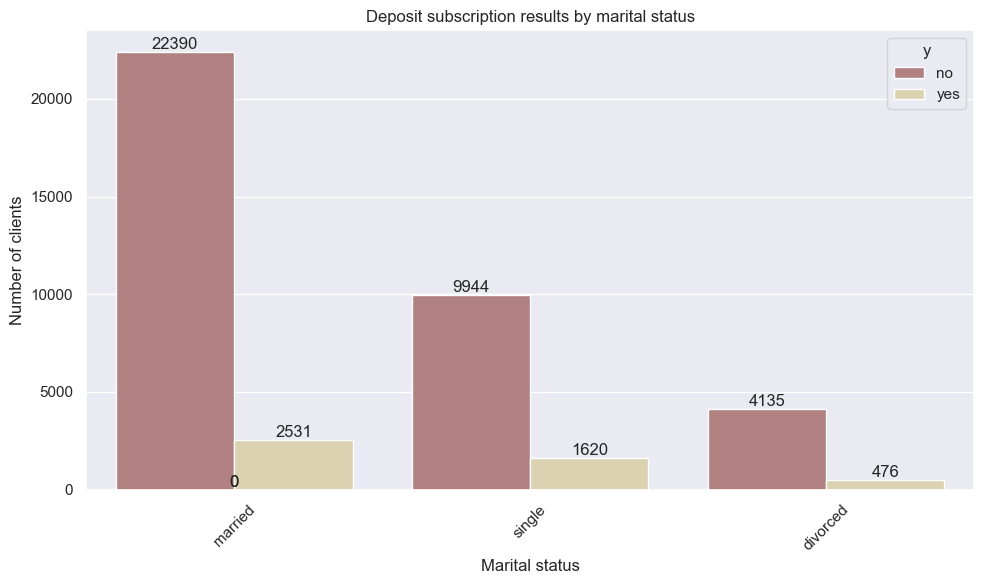

In [27]:
#marital - y

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='marital', hue='y', data=df, palette='pink')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Deposit subscription results by marital status')
plt.xlabel('Marital status')
plt.ylabel('Number of clients')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [28]:
#Average age of unmarried clients

not_married_clients = df[(df['marital'] == 'single') | (df['marital'] == 'divorced') | (df['marital'] == pd.NA)]
average_age_not_married = not_married_clients['age'].mean()

print(f'Average age of unmarried clients: {average_age_not_married:.2f}')

Average age of unmarried clients: 36.50


##### Освітні та робочі дані про клієнта:

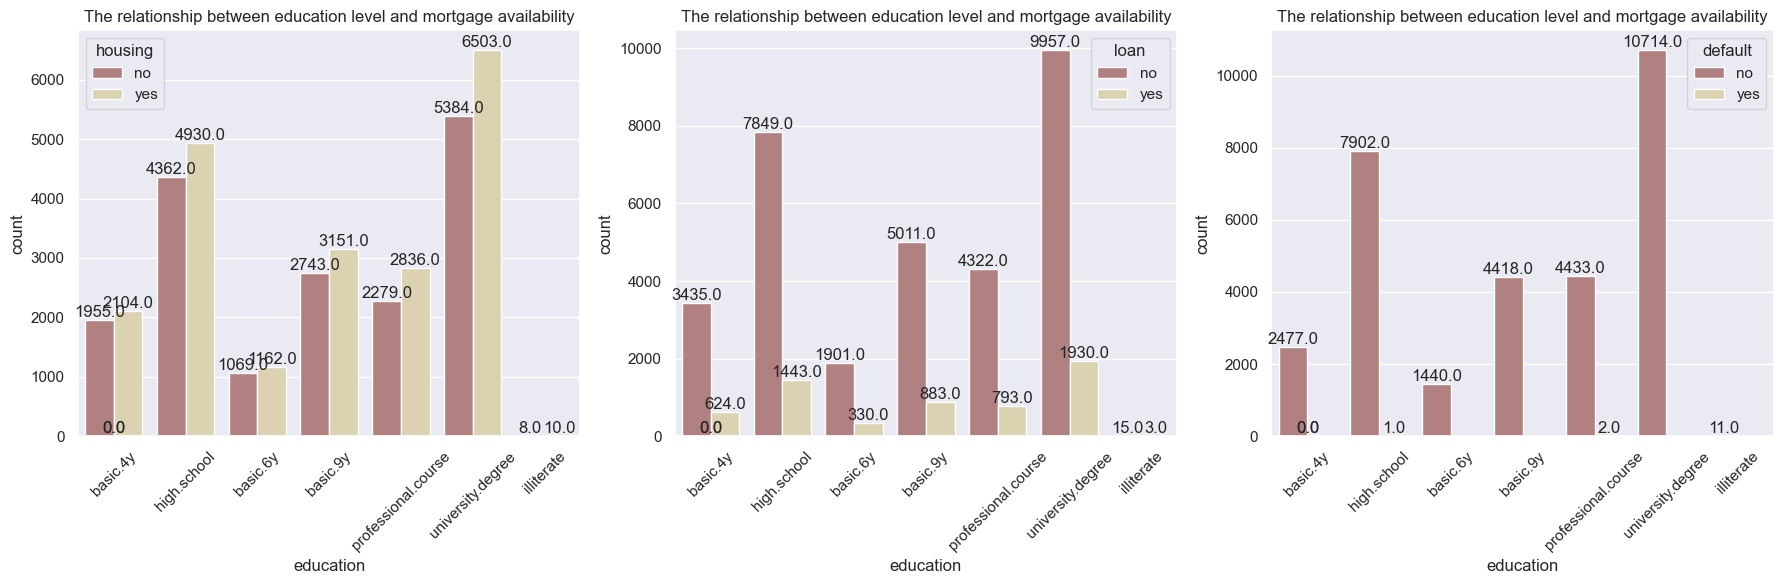

In [29]:
#education - credits
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

create_countplot('education', 'housing', "The relationship between education level and mortgage availability", axes[0])
create_countplot('education', 'loan', "The relationship between education level and mortgage availability", axes[1])
create_countplot('education', 'default', "The relationship between education level and mortgage availability", axes[2])

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

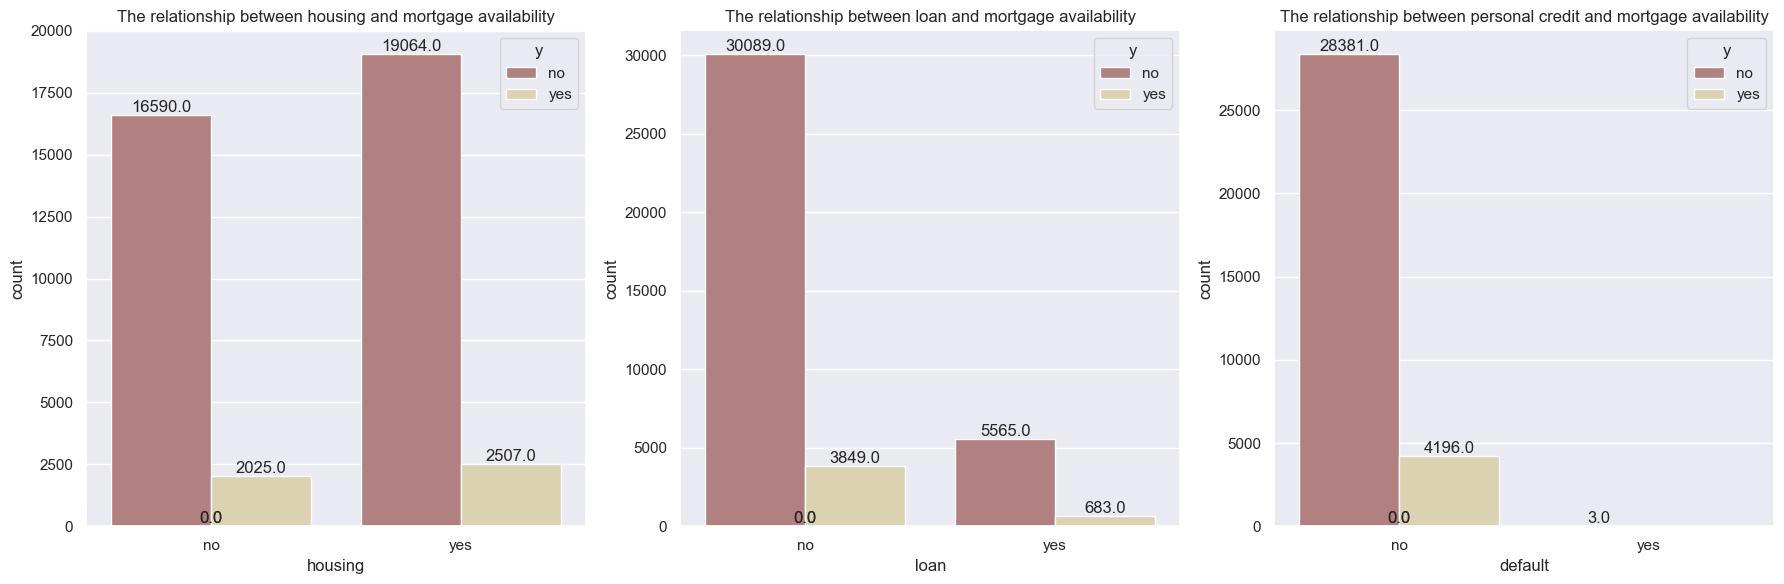

In [30]:
# Education - housing|loan|Default (y\n) => mortage availability
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

create_countplot('housing', 'y', "The relationship between housing and mortgage availability", axes[0])
create_countplot('loan', 'y', "The relationship between loan and mortgage availability", axes[1])
create_countplot('default', 'y', "The relationship between personal credit and mortgage availability", axes[2])

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of jobs')

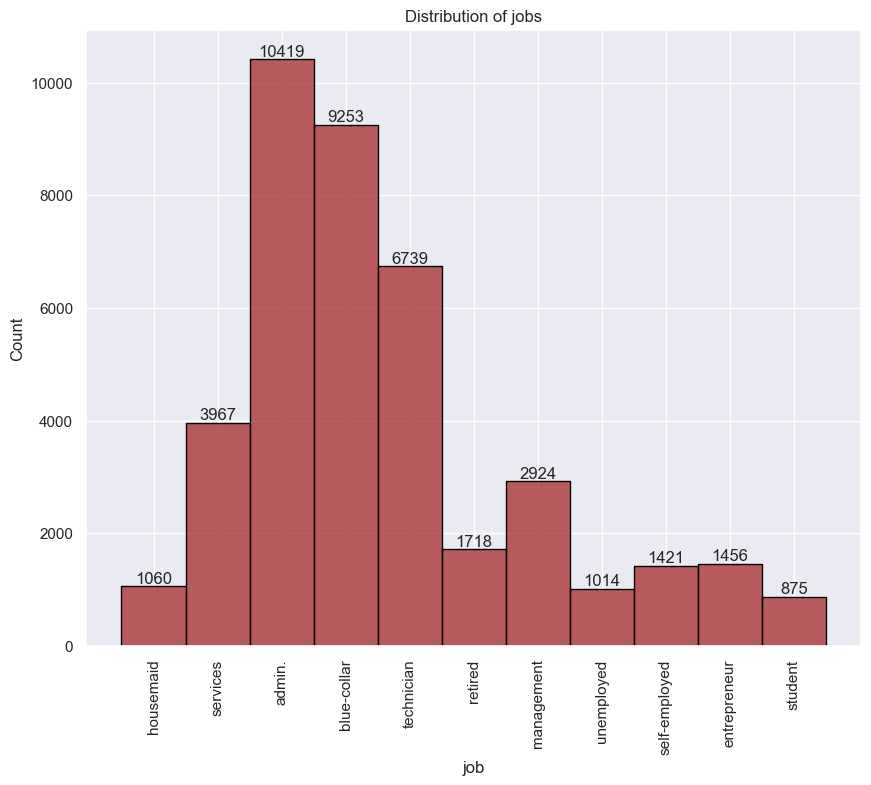

In [31]:
# Distribution of jobs
ax = sns.histplot(data = df['job'], edgecolor = 'black', color = 'brown')
for i in ax.containers:
    ax.bar_label(i, )

plt.xticks(rotation=90)
plt.title('Distribution of jobs')

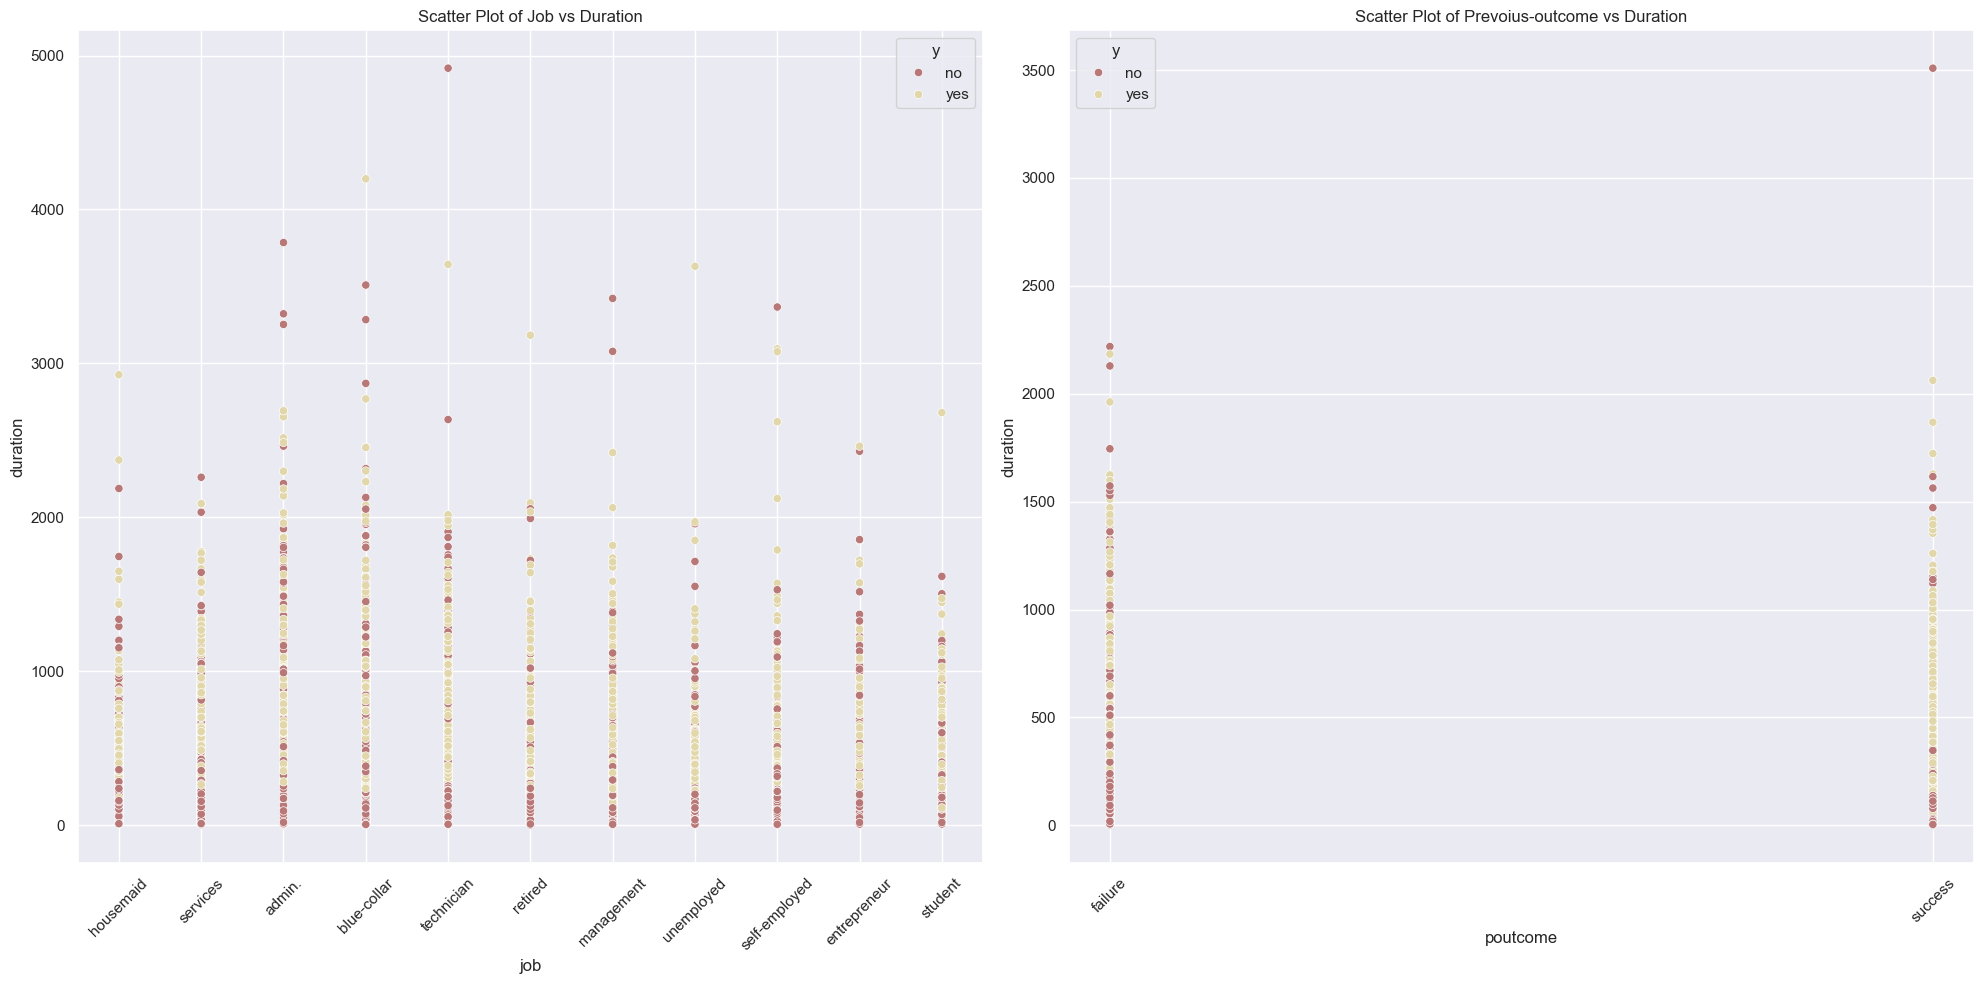

In [32]:
# job - duration

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) 


#######################
ax = sns.scatterplot(x='job', y='duration', data=df, hue='y', palette='pink', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Scatter Plot of Job vs Duration')

#######################
ax = sns.scatterplot(x='poutcome', y='duration', data=df, hue='y', palette='pink', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Scatter Plot of Prevoius-outcome vs Duration')


plt.tight_layout()
plt.show()

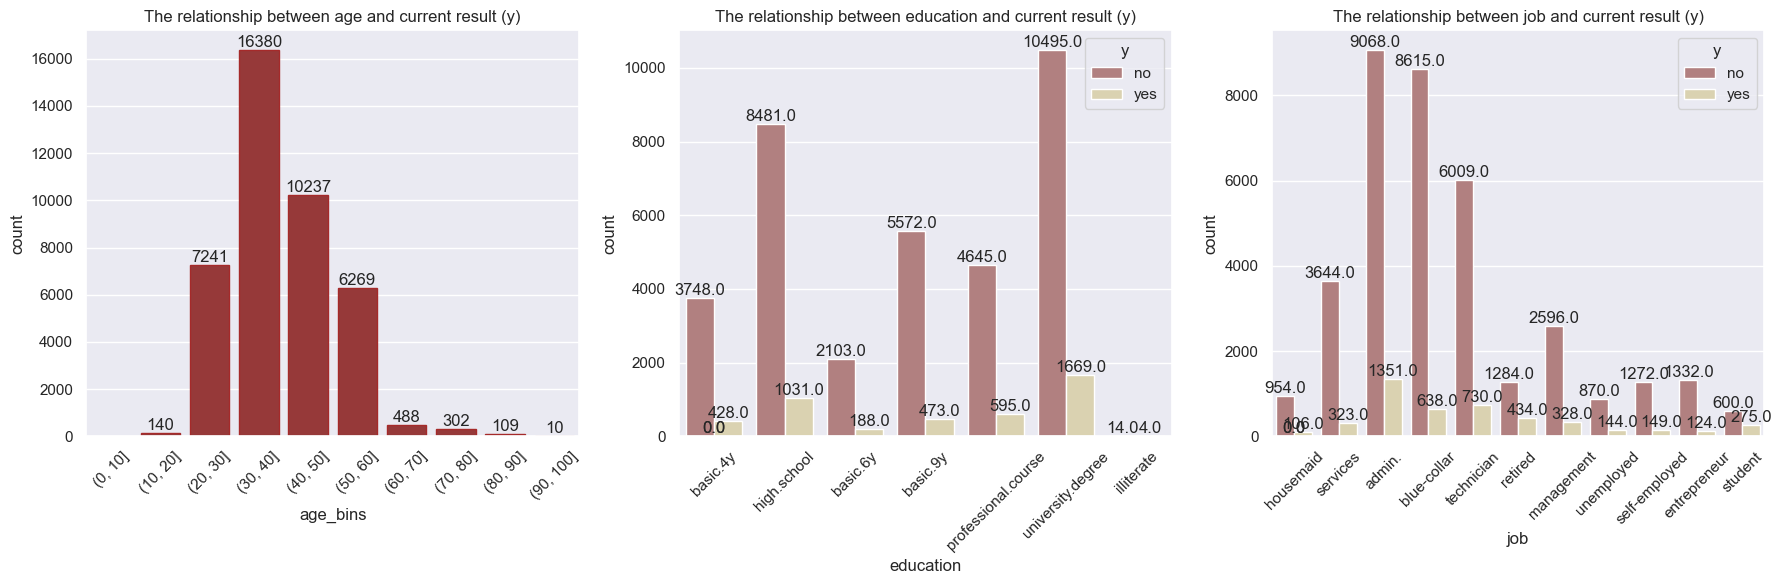

In [41]:
# #age-ed-job => current result (y)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


df['age_bins'] = pd.cut(df['age'], bins=np.arange(0, 101, 10))
ax = sns.countplot(x='age_bins', data=df, edgecolor='brown', color='brown', ax=axes[0])

for i in ax.containers:
    ax.bar_label(i, )

axes[0].set_title('The relationship between age and current result (y)')
axes[0].tick_params(axis='x', rotation=45)

create_countplot('education', 'y', "The relationship between education and current result (y)", axes[1])
axes[1].tick_params(axis='x', rotation=45)
create_countplot('job', 'y', "The relationship between job and current result (y)", axes[2])
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Професійні банківські дані:

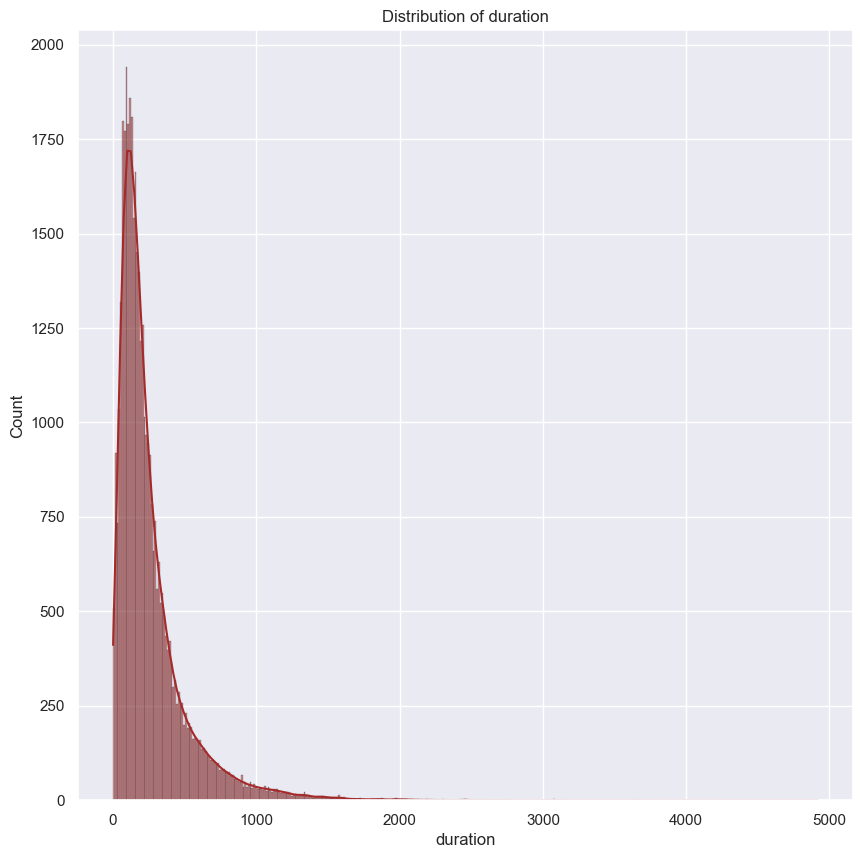

In [ ]:
# Distribution of duration
plt.figure(figsize = (10, 10))
sns.histplot(data=df['duration'], edgecolor = 'black', color='brown', kde = True)

plt.title('Distribution of duration')
plt.show()

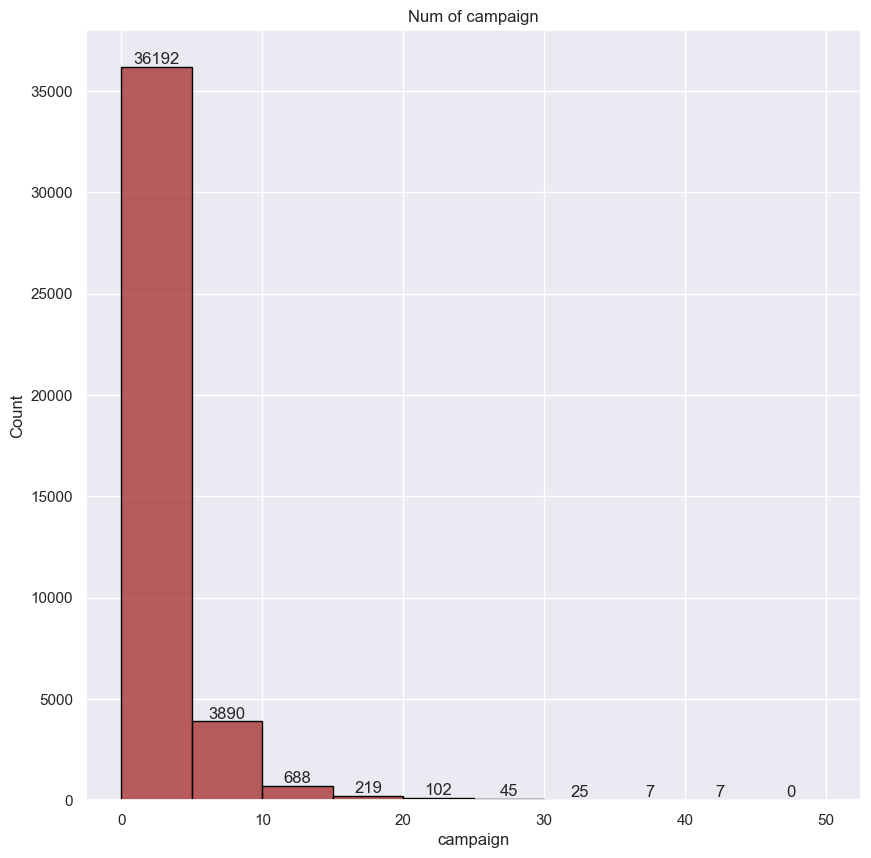

In [ ]:
#Campaign

bins = np.arange(0, 51, 5)

plt.figure(figsize=(10, 10))
ax = sns.histplot(df['campaign'], bins=bins, kde=False, edgecolor='black', color = 'brown')
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Num of campaign')
plt.show()

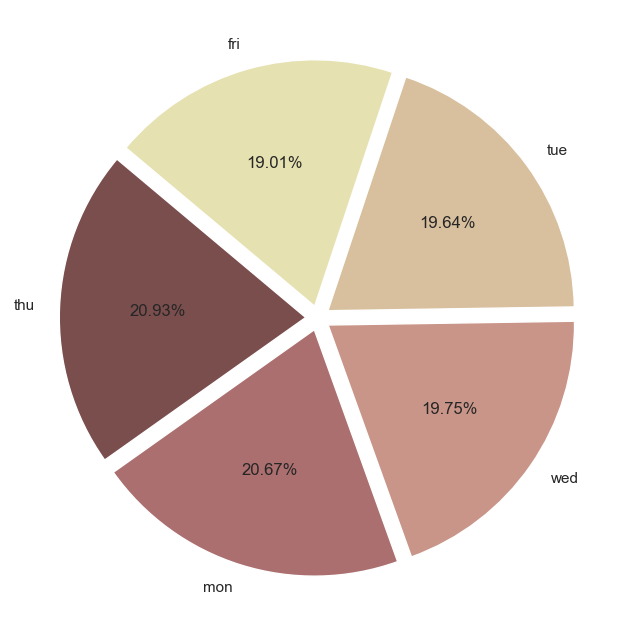

In [ ]:
# day of week
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['day_of_week'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
   
plt.show() 

In [ ]:
#Most of the failures on: day
clients_no_deposit = df[df['y'] == 'no']
day_of_week_counts = clients_no_deposit['day_of_week'].value_counts()

most_frequent_day = day_of_week_counts.idxmax()
print(f"Most of the failures on: {most_frequent_day}")


Most of the failures on: mon


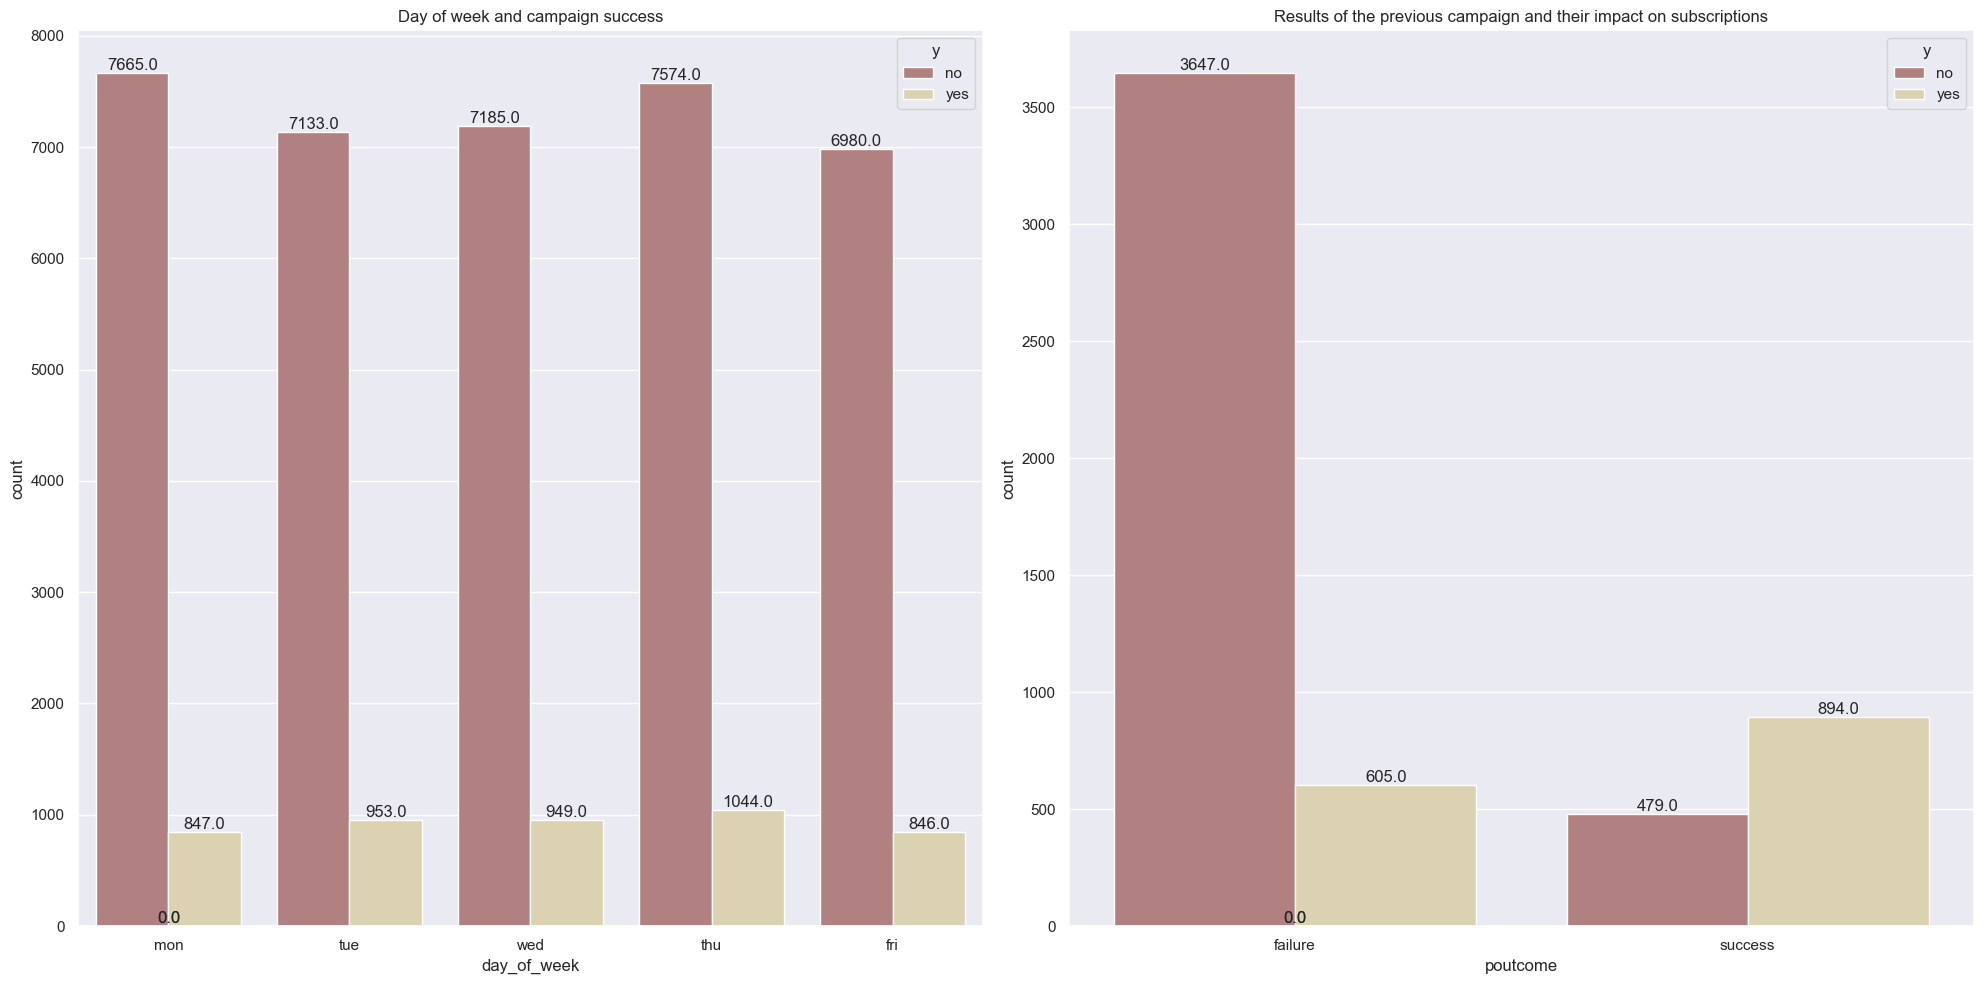

In [ ]:
#day|poutcome => y
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

create_countplot('day_of_week', 'y', "Day of week and campaign success", axes[0])
create_countplot('poutcome', 'y', "Results of the previous campaign and their impact on subscriptions", axes[1])

plt.tight_layout()
plt.show()

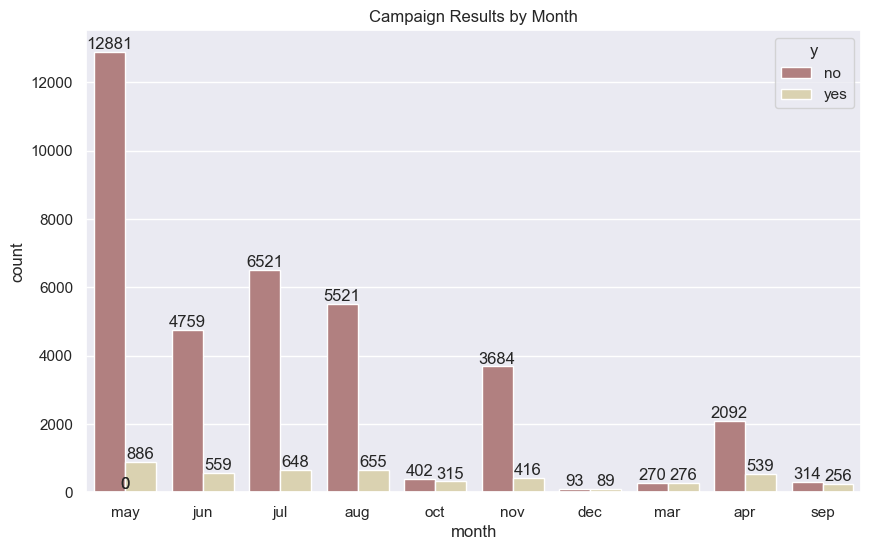

In [ ]:
#The result of the current campaign - month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', hue='y', data=df, palette='pink')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Campaign Results by Month')
plt.show()


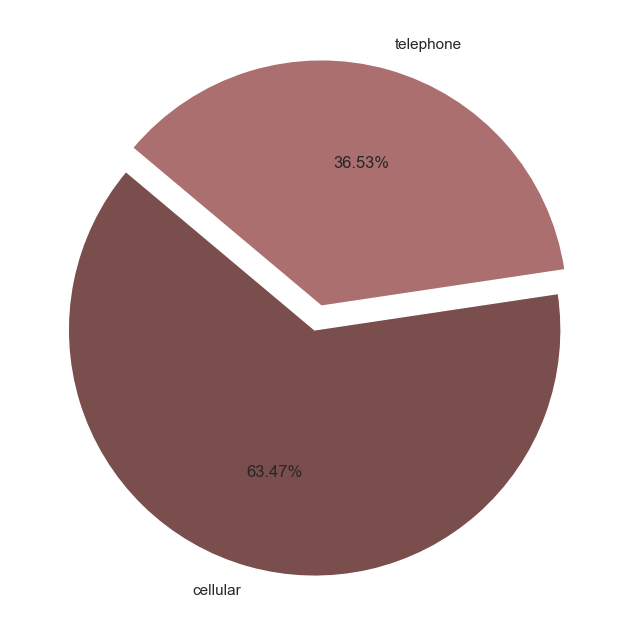

In [ ]:
# contact
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['contact'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

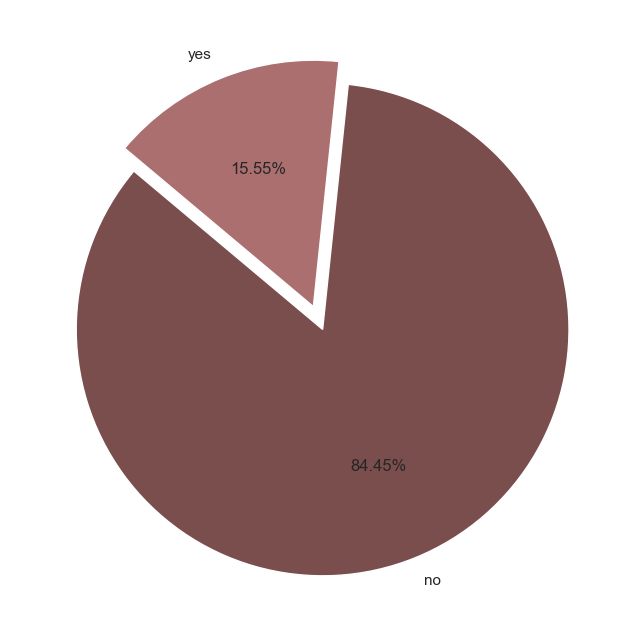

In [ ]:
# loan y/n
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['loan'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

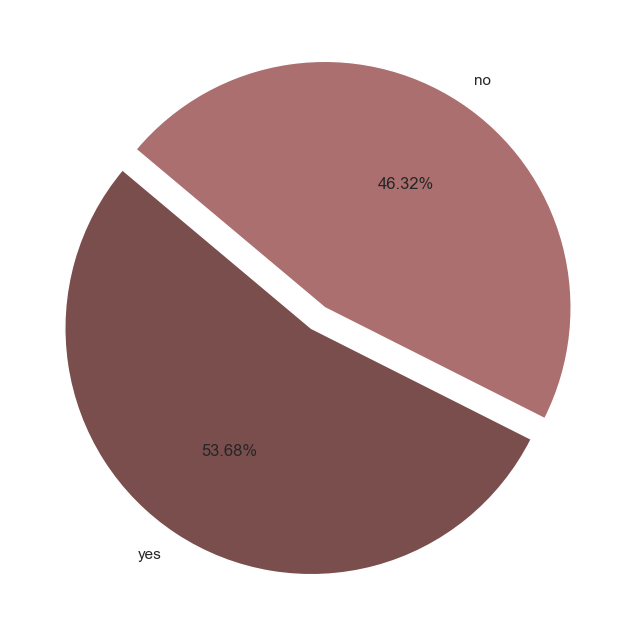

In [ ]:
#housing y/n
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['housing'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

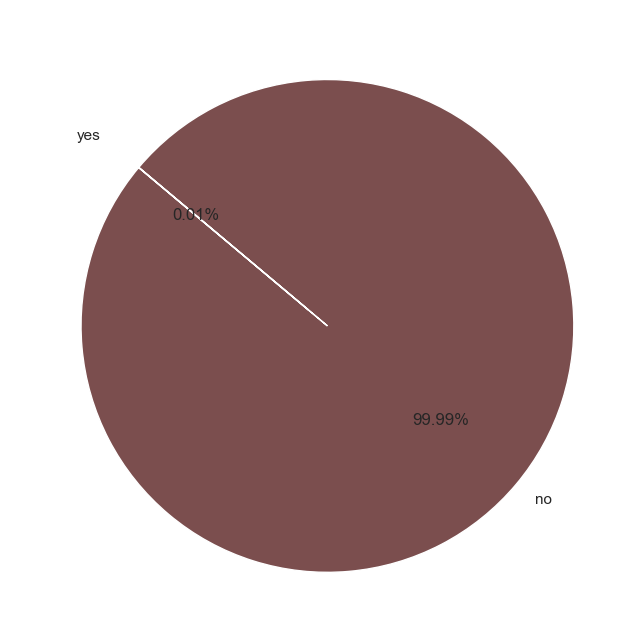

In [ ]:
#default y/n
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['default'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

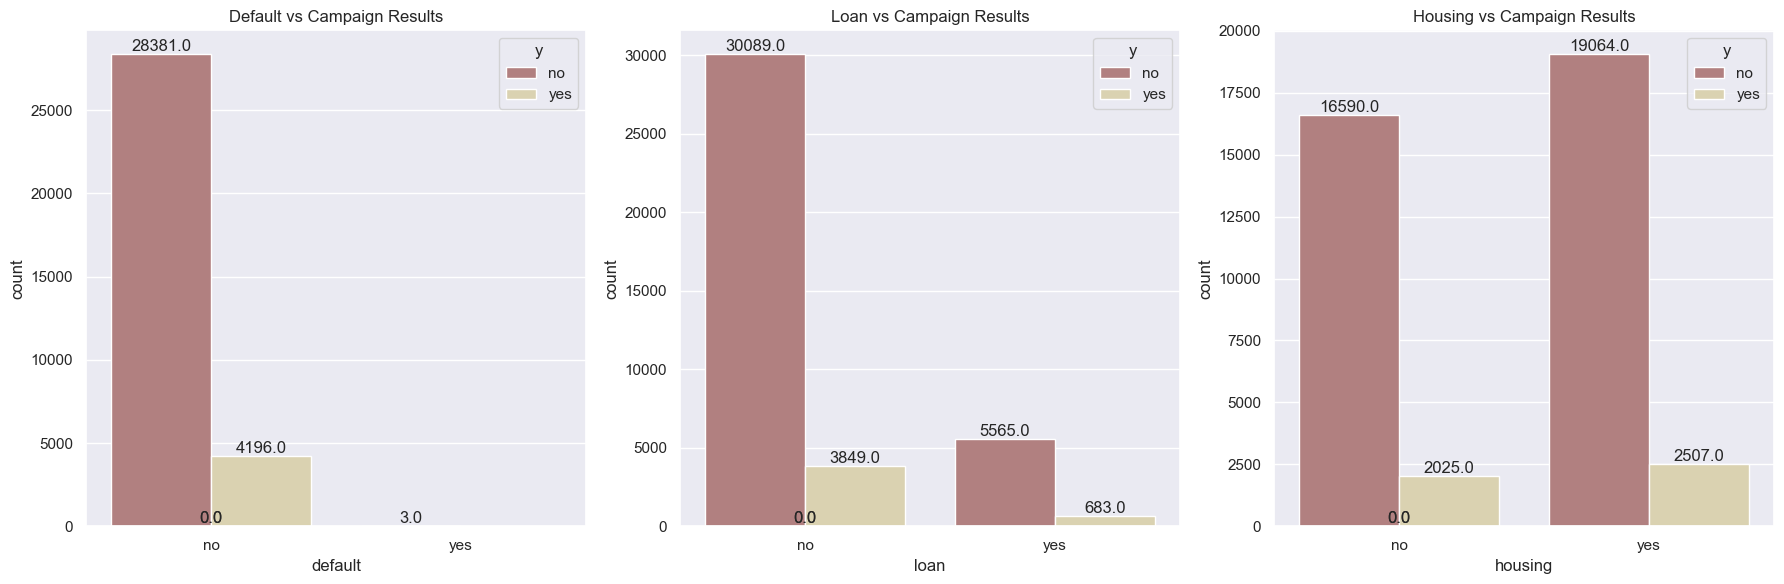

In [ ]:
#Credits - The result of the current campaign

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

create_countplot('default', 'y', "Default vs Campaign Results", axes[0])
create_countplot('loan', 'y', "Loan vs Campaign Results", axes[1])
create_countplot('housing', 'y', "Housing vs Campaign Results", axes[2])

plt.tight_layout()
plt.show()


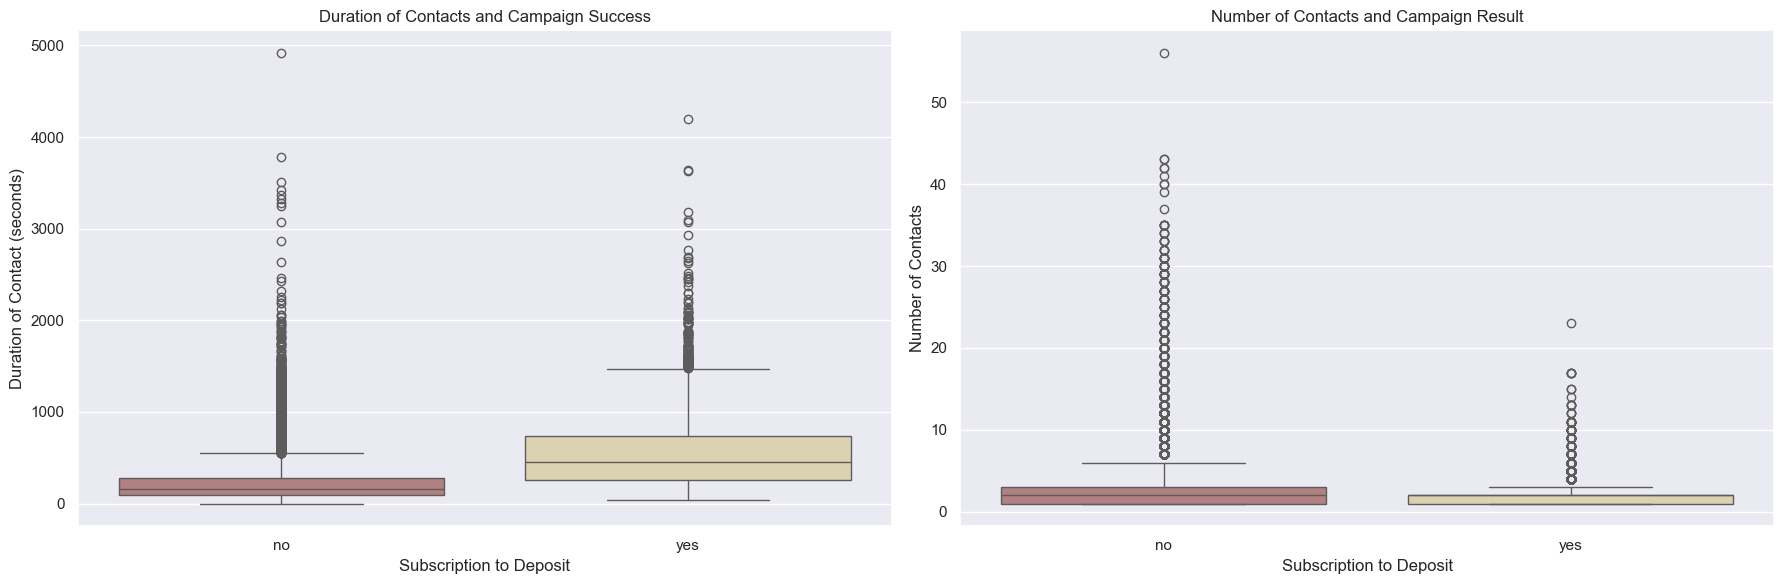

In [ ]:
#duration | campaign => y

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

create_boxplot(x='y', 
               y='duration', 
               data=df, 
               title='Duration of Contacts and Campaign Success', 
               xlabel='Subscription to Deposit', 
               ylabel='Duration of Contact (seconds)', 
               palette='pink', 
               ax=axes[0])

create_boxplot(x='y', 
               y='campaign', 
               data=df, 
               title='Number of Contacts and Campaign Result', 
               xlabel='Subscription to Deposit', 
               ylabel='Number of Contacts', 
               palette='pink', 
               ax=axes[1])

plt.tight_layout()
plt.show()


##### Знаходження значень, які мають найбільший вплив на цільову змінну:

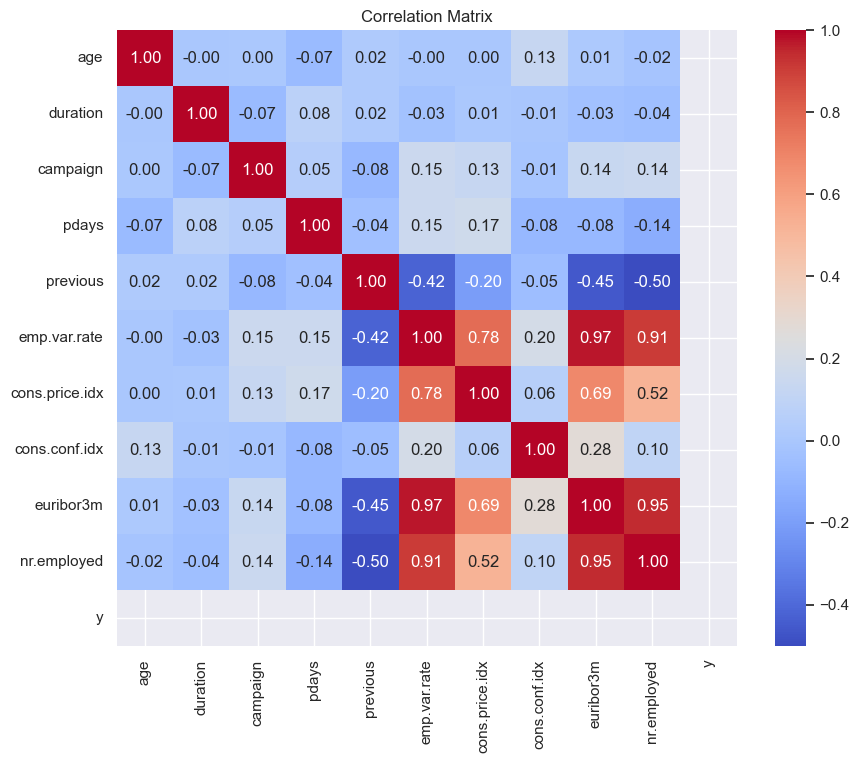

In [ ]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()